# Autoencoders
Implementations for the Seminar Current Topics in Deep Neural Networks

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, UpSampling2D, Conv2DTranspose
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist

## Data preprocessing

### Downloading and Preprocessing of MNIST dataset and adding some noise to the data.

In [2]:
(X_train, train_y), (X_test, test_y) = mnist.load_data()

# to convert values from 0 to 255 into range 0 to 1.
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = np.reshape(X_train, (len(X_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
X_test = np.reshape(X_test, (len(X_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

noise_factor = 0.5
#np.random.normal => random means to obtain random samples and normal means normal or gaussian distribution, i.e. random sample from gaussian distribution
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)  
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape) 

# to make values in the range of 0 to 1, if values < 0 then they will be equal to 0 and values > 1 then they will be equal to 1.
X_train_noisy = np.clip(X_train_noisy, 0., 1.)   
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

## Let's visualize original and noisy images

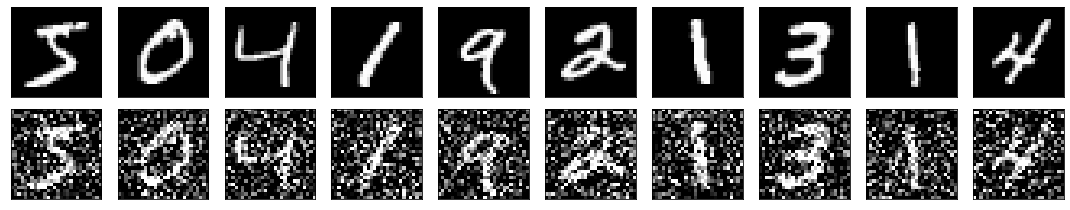

In [3]:
n=10
plt.figure(figsize=(15, 3))
for i in range(n):
  # first row
  plt.subplot(2, n, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i].reshape(28, 28), cmap='gray')

  # second row
  plt.subplot(2, n, n+i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train_noisy[i].reshape(28, 28), cmap='gray')
plt.tight_layout()
plt.show()


## Shallow Autoencoder

In [4]:
latent_dim = 32 

class Autoencoder_shallow(Model):
	def __init__(self, latent_dim):
		super(Autoencoder_shallow, self).__init__()
		self.latent_dim = latent_dim   
		self.encoder = tf.keras.Sequential([
			layers.Flatten(),
			layers.Dense(latent_dim, activation='relu'),
		])
		self.decoder = tf.keras.Sequential([
			layers.Dense(784, activation='sigmoid'),
			layers.Reshape((28, 28))
		])

	def call(self, x):
		encoded = self.encoder(x)
		decoded = self.decoder(encoded)
		return decoded

	def code_and_output(self, x):
		encoded = self.encoder(x)
		decoded = self.decoder(encoded)
		return encoded.numpy(),decoded.numpy()

In [ ]:

autoencoder = Autoencoder_shallow(latent_dim)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=8, verbose=1, mode='auto')
history = autoencoder.fit(X_train_noisy, X_train,
                epochs=200,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test_noisy, X_test),
                callbacks=[early_stopper])

In [ ]:
# prediction and visualization
code, output = autoencoder.code_and_output(X_test)
plt.figure(figsize=(15, 5))
n=10
for i in range(n):
    # first row
    plt.subplot(3, n, i+1)
    plt.xticks([]) # to remove x-axis  the [] empty list indicates this
    plt.yticks([]) # to remove y-axis
    plt.grid(False) # to remove grid
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray') #display the image 

    # second row
    plt.subplot(3, n, n+(i+1))
    plt.xticks([]) # to remove x-axis  the [] empty list indicates this
    plt.yticks([]) # to remove y-axis
    plt.grid(False) # to remove grid
    plt.imshow(code[i].reshape(8, 4), cmap='gray') #display the image 

    # third row
    plt.subplot(3, n, 2*n+(i+1))
    plt.xticks([]) # to remove x-axis  the [] empty list indicates this
    plt.yticks([]) # to remove y-axis
    plt.grid(False) # to remove grid
    plt.imshow(output[i].reshape(28, 28), cmap='gray') #display the image 
plt.tight_layout() # to have a proper space in the subplots
plt.show()

## Deep Autoencoder

In [7]:
latent_dim = 32 

class Autoencoder_deep(Model):
	def __init__(self, latent_dim):
		super(Autoencoder_deep, self).__init__()
		self.latent_dim = latent_dim   
		self.encoder = tf.keras.Sequential([
			layers.Flatten(),
			layers.Dense(128, activation='relu'),
			layers.Dense(64, activation='relu'),
			layers.Dense(latent_dim, activation='relu'),
		])
		self.decoder = tf.keras.Sequential([
			layers.Dense(64, activation='relu'),
			layers.Dense(128, activation='relu'),
			layers.Dense(784, activation='sigmoid'),
			layers.Reshape((28, 28))
		])

	def call(self, x):
		encoded = self.encoder(x)
		decoded = self.decoder(encoded)
		return decoded
	
	def code_and_output(self, x):
		encoded = self.encoder(x)
		decoded = self.decoder(encoded)
		return encoded.numpy(),decoded.numpy()

In [ ]:
autoencoder = Autoencoder_deep(latent_dim)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=8, verbose=1, mode='auto')
history = autoencoder.fit(X_train_noisy, X_train,
                epochs=200,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test_noisy, X_test),
                callbacks=[early_stopper])

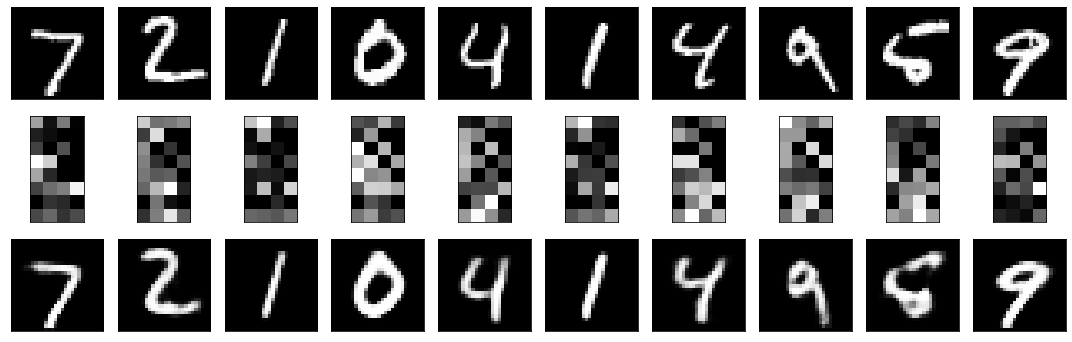

In [9]:
# prediction and visualization
code, output = autoencoder.code_and_output(X_test)
plt.figure(figsize=(15, 5))
n=10
for i in range(n):
    # first row
    plt.subplot(3, n, i+1)
    plt.xticks([]) # to remove x-axis  the [] empty list indicates this
    plt.yticks([]) # to remove y-axis
    plt.grid(False) # to remove grid
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray') #display the image 

    # second row
    plt.subplot(3, n, n+(i+1))
    plt.xticks([]) # to remove x-axis  the [] empty list indicates this
    plt.yticks([]) # to remove y-axis
    plt.grid(False) # to remove grid
    plt.imshow(code[i].reshape(8, 4), cmap='gray') #display the image 

    # third row
    plt.subplot(3, n, 2*n+(i+1))
    plt.xticks([]) # to remove x-axis  the [] empty list indicates this
    plt.yticks([]) # to remove y-axis
    plt.grid(False) # to remove grid
    plt.imshow(output[i].reshape(28, 28), cmap='gray') #display the image 
plt.tight_layout() # to have a proper space in the subplots
plt.show()

## Convolutional Denoising Autoencoder

In [ ]:
Input_img = Input(shape=(28, 28, 1))  

x1 = Conv2D(16, (3, 3), activation='relu', padding='same')(Input_img)
x1 = MaxPool2D( (2, 2), padding='same')(x1)
x2 = Conv2D(32, (3, 3), activation='relu', padding='same')(x1)
x2 = MaxPool2D( (2, 2), padding='same')(x2)
x3 = Conv2D(64, (3, 3), activation='relu', padding='valid')(x2)
encoded    = MaxPool2D( (2, 2), padding='same')(x3)

out = encoded.reshape(-1)
out = Dense(16)(out)
out = Dense(3*3*64)(out)
out = out.reshape((3,3,64))

# decoding architecture
x3 = Conv2DTranspose(32, (3, 3), strides=2, activation='relu', padding='valid')(encoded)
x2 = Conv2DTranspose(16, (3, 3), strides=2, activation='relu', padding='same')(x3)
x1 = Conv2DTranspose(1, (3, 3), strides=2, activation='relu', padding='same')(x2)
decoded=x1


autoencoder = Model(Input_img, decoded)
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 5, 5, 64)          1849

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history = autoencoder.fit(X_train_noisy, X_train,
                epochs=200,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test_noisy, X_test),
                callbacks=[early_stopper])

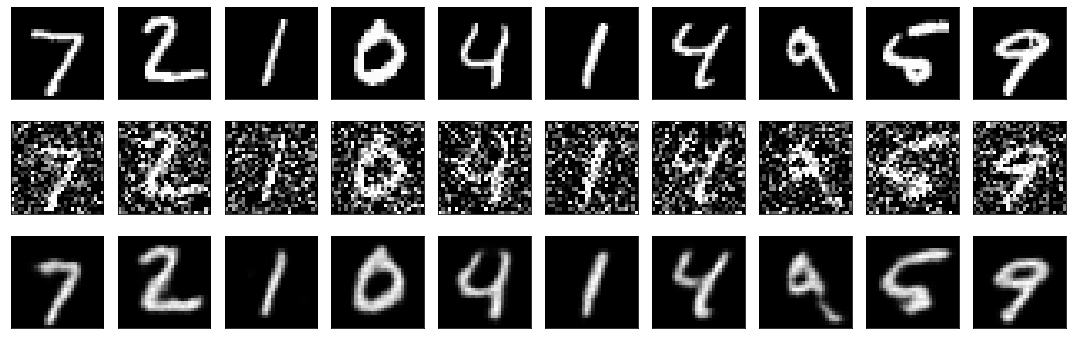

In [ ]:
# prediction and visualization
pred = autoencoder.predict(X_test_noisy)
plt.figure(figsize=(15, 5))
n=10
for i in range(n):
    # first row
    plt.subplot(3, n, i+1)
    plt.xticks([]) # to remove x-axis  the [] empty list indicates this
    plt.yticks([]) # to remove y-axis
    plt.grid(False) # to remove grid
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray') #display the image 

    # second row
    plt.subplot(3, n, n+(i+1))
    plt.xticks([]) # to remove x-axis  the [] empty list indicates this
    plt.yticks([]) # to remove y-axis
    plt.grid(False) # to remove grid
    plt.imshow(X_test_noisy[i].reshape(28, 28), cmap='gray') #display the image 

    # third row
    plt.subplot(3, n, 2*n+(i+1))
    plt.xticks([]) # to remove x-axis  the [] empty list indicates this
    plt.yticks([]) # to remove y-axis
    plt.grid(False) # to remove grid
    plt.imshow(pred[i].reshape(28, 28), cmap='gray') #display the image 
plt.tight_layout() # to have a proper space in the subplots
plt.show()